# LinearRegression

### 목표
- carseat 데이터 활용하여 각 지역 판매량(Sales) 예측해보자

### 목차
0. 라이브러리 및 데이터 준비하기
    1. 라이브러리 불러오기
    2. 데이터 불러오기
1. 데이터 이해하기
    1. 데이터 정보 확인
    2. 데이터 기술통계 확인
    4. 데이터 상관관계 확인
2. 데이터 준비하기
    1. x, y 분리
    2. 가변수화
    3. 학습용 평가용 데이터 분리
3. 모델링
    1. 불러오기
    2. 선언하기
    3. 학습하기
    4. 예측하기
    5. 평가하기
    6. 회귀계수 확인 및 시각화

# 0. 라이브러리 및 데이터 준비하기

기본 라이브러리와 데이터를 불러온다.

In [58]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore') # 경고 무시
%config InlineBackend.figure_format = 'retina' # 시각화 이미지 고해상도 출력하기

In [59]:
# 데이터 읽어오기
path = '../data/carseats.csv'
data = pd.read_csv(path)

In [60]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


**데이터 설명**

- Sales: 각 지역 판매량(단위: 1,000개)
- CompPrice: 경쟁사 가격 (단위: 달러)
- Income: 지역 평균 소득 (단위: 1,000달러)
- Advertising: 각 지역, 회사의 광고 예산 (단위: 1,000달러)
- Population: 지역 인구 수 (단위: 1,000명)
- Price: 자사 지역별 판매 가격 (단위: 달러)
- ShelveLoc: 진열 상태
- Age: 지역 인구의 평균 연령
- Education: 각 지역 교육 수준
- Urban: 도심 지역 여부 (Yes,No)
- US: 매장이 미국에 있는지 여부 (Yes, No)

# 1.데이터 이해하기

데이터를 충분히 이해할 수 있도록 다양한 탐색 과정 수행한다.

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [62]:
# NaN 값 확인
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

- 데이터의 결측치는 없는 것으로 확인 된다.
- objects 형식이 있으므로 가변수화가 필요할 듯하다

#### 각 데이터별, 기술통계를 확인해보자
```
data.describe().t
```

In [63]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


#### 각 데이터별, 상관관계 확인 및 시각화 해보자
```
# 상관관계 확인
data.corr()

# 시각화
sns.heatmap(data.corr(),
           annot = True,
           cmap = 'Blues',
           fmt='.2f')
plt.show()

- annot : 글자 표시
- cmap : 색상표
- fmt : 포맷형식(숫자 얼만큼 나오게 할지)
- square : 정사각형 만들지 말지
- annot_kws : 키워드별 수정사항
```

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


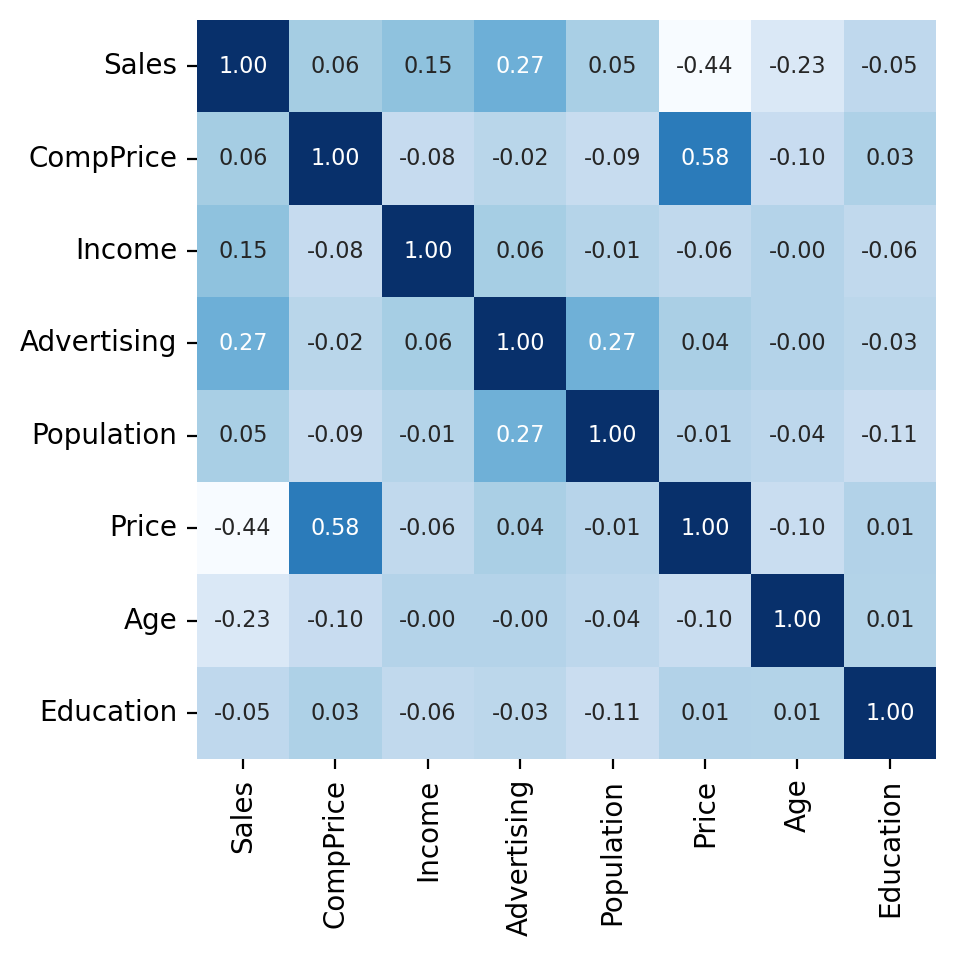

In [64]:
display(data.corr())
sns.heatmap(data.corr(),
           annot = True,
           cmap = 'Blues',
           fmt='.2f',
           cbar=False,
           square=True,
           annot_kws={'size':8})
plt.show()

# 2. 데이터 준비하기
전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비한다.
1. x, y 분리
2. 가변수화
3. 학습용 평가용 데이터 분리

#### 1. x, y 분리
- target 변수를 명확히 지정한다. : Sales
- target을 제외한 변수를 x 데이터프레임으로 선언
- y데이터프레임은 target변수만을 가진다

In [65]:
target ='Sales'

x = data.drop(target, axis=1)
y = data.loc[:, target]

display(x.head())
display(y.head())

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,Bad,42,17,Yes,Yes
1,111,48,16,260,83,Good,65,10,Yes,Yes
2,113,35,10,269,80,Medium,59,12,Yes,Yes
3,117,100,4,466,97,Medium,55,14,Yes,Yes
4,141,64,3,340,128,Bad,38,13,Yes,No


0     9.50
1    11.22
2    10.06
3     7.40
4     4.15
Name: Sales, dtype: float64

#### 2. 가변수화

In [66]:
# 가변수화 대상: ShelveLoc, Education, Urban, US
dumm_cols = ['ShelveLoc', 'Education', 'Urban', 'US']

# 가변수화
x = pd.get_dummies(x, columns =dumm_cols)

# 확인
x.head()

,CompPrice,Income,Advertising,Population,Price,Age,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Education_10,...,Education_13,Education_14,Education_15,Education_16,Education_17,Education_18,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,1,0,0,0,...,0,0,0,0,1,0,0,1,0,1
1,111,48,16,260,83,65,0,1,0,1,...,0,0,0,0,0,0,0,1,0,1
2,113,35,10,269,80,59,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
3,117,100,4,466,97,55,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1
4,141,64,3,340,128,38,1,0,0,0,...,1,0,0,0,0,0,0,1,1,0


#### 3. 학습용, 평가용 데이터 분리
- 학습용, 평가용 데이터를 적절한 비율로 분리한다.
- 반복 실행 시 동일한 결과를 얻기 위해 random_state 옵션을 지정한다.

In [67]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 학습용 : 테스트용을 7:3 비율로 분리한다.
# train_test_split의 경우 데이터를 섞은 후, 분리한다.
# 그렇기 때문에 random_state 설정이 없을 경우 테스트 때마다 결과값이 달라질 수 있다.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [68]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(280, 22)
(120, 22)
(280,)
(120,)


In [69]:
x_train.head()

,CompPrice,Income,Advertising,Population,Price,Age,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Education_10,...,Education_13,Education_14,Education_15,Education_16,Education_17,Education_18,Urban_No,Urban_Yes,US_No,US_Yes
39,130,60,0,144,138,38,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
167,106,73,0,216,93,60,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
383,98,117,0,76,68,63,0,0,1,1,...,0,0,0,0,0,0,0,1,1,0
221,124,44,0,125,107,80,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
351,124,115,16,458,105,62,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1


# 3. 모델링
모델을 **선언**하고, **학습**하고, **평가**하는 과정을 진행한다

0. 문제 구분하기 -> 회귀인지 분류인지
1. 불러오기
2. 선언하기
3. 학습하기
3. 예측하기
4. 평가하기

#### 1. 불러오기
- 알고리즘 : LinearRegression
- 평가 방법 : mean_absolute_error

In [70]:
from sklearn.linear_model import LinearRegression # 선형회귀 알고리즘
from sklearn.metrics import mean_absolute_error # 평균 절대값 오차 
from sklearn.metrics import r2_score

#### 2. 선언하기

In [71]:
model = LinearRegression()

#### 3. 학습하기

In [72]:
model.fit(x_train, y_train)

LinearRegression()

#### 4. 예측하기

In [73]:
y_pred = model.predict(x_test)

print(y_pred[:10]) # 예측값 10개 보기
print(y_test.values[:10]) # 실제값 10개 보기

[ 5.32139634 10.66617664  4.22436984 10.19998279 10.91242932  8.59975396
  3.03029187  7.35709681  5.84259771  4.2431058 ]
[ 5.94  9.34  3.15 11.54  9.03  7.81  2.52  6.64  7.81  6.97]


#### 5. 평가하기

In [74]:
# 성능 평가
print(f"MAE : {mean_absolute_error(y_test, y_pred)}")# 예측값에서 MAE만큼 오차가 있다는 것을 이야기함
print(f"R2-Score : {r2_score(y_test, y_pred)}")

MAE : 0.8416098802896038
R2-Score : 0.8657819916636789


#### 6. 회귀계수 확인 및 시각화

In [75]:
print(list(x))
print(model.coef_.round(2))
print(model.intercept_.round(2))

['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'ShelveLoc_Bad', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Education_10', 'Education_11', 'Education_12', 'Education_13', 'Education_14', 'Education_15', 'Education_16', 'Education_17', 'Education_18', 'Urban_No', 'Urban_Yes', 'US_No', 'US_Yes']
[ 0.09  0.01  0.13 -0.   -0.1  -0.05 -2.29  2.56 -0.27  0.2  -0.07 -0.02
 -0.01  0.07  0.32 -0.17 -0.13 -0.18 -0.09  0.09  0.12 -0.12]
8.16


In [77]:
# 가중치 데이터 프레임화
tmp = pd.DataFrame()
tmp['feature'] = list(x)
tmp['weighted'] = model.coef_
tmp.sort_values(by='weighted', ascending=True, inplace=True) # 정렬하기
display(tmp.head())

,feature,weighted
6,ShelveLoc_Bad,-2.294894
8,ShelveLoc_Medium,-0.266315
17,Education_18,-0.183385
15,Education_16,-0.166612
16,Education_17,-0.133484


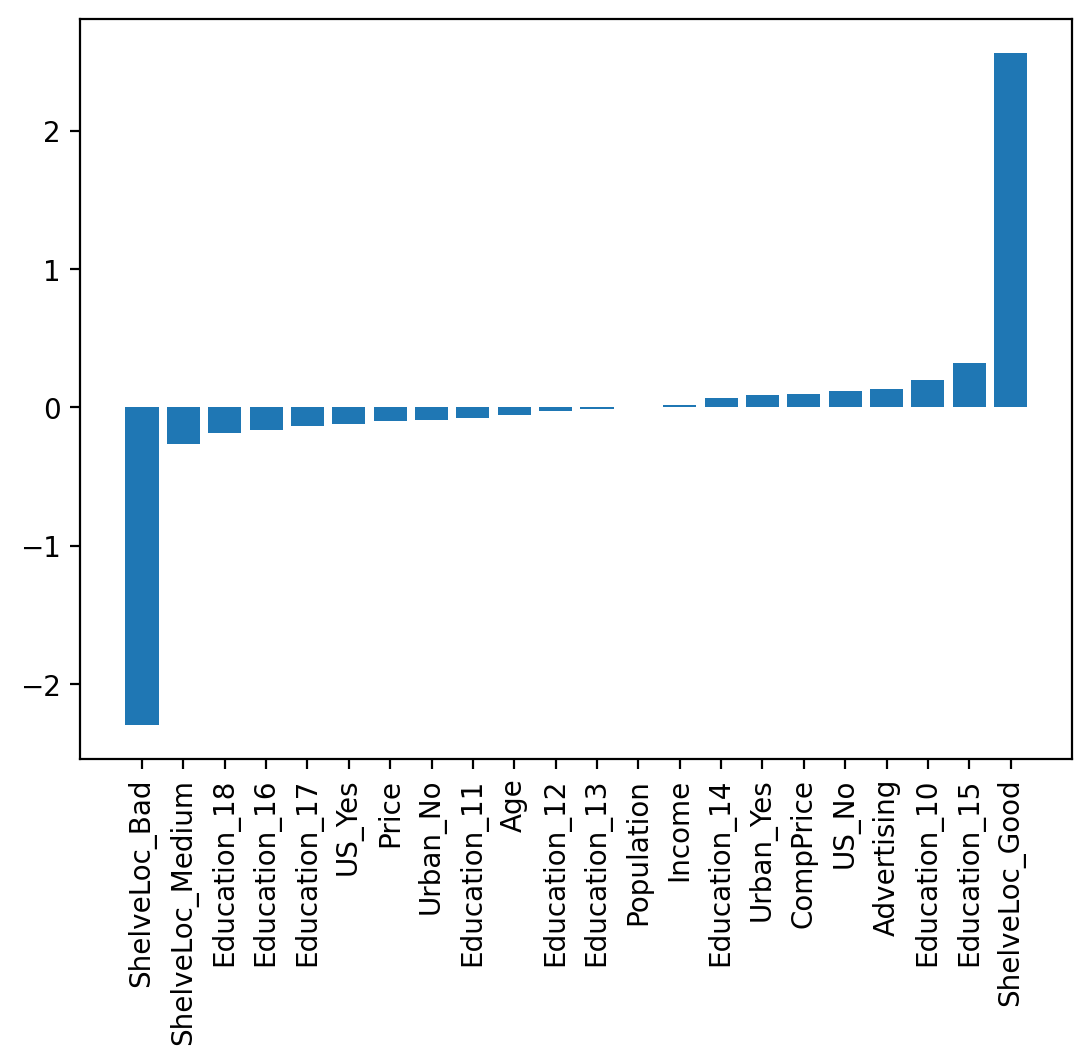

In [78]:
# 가중치 시각화
plt.bar(tmp['feature'], tmp['weighted'])



plt.xticks(rotation=90)
plt.show()